<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/CatsVsDogsKaggle(Cool_And_New).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:09<00:00, 166MB/s]
100% 812M/812M [00:09<00:00, 92.3MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

In [7]:
import os, shutil, pathlib

In [8]:
original_dir = pathlib.Path('train')
new_dir = pathlib.Path('cats_vs_dogs_smaller')

In [13]:
def make_subset(subset_name, start_indx, end_indx):
  for category in ('cat', 'dog'):
    dir = new_dir / subset_name / category
    os.makedirs(dir)
    filenames = [f'{category}.{i}.jpg' for i in range(start_indx, end_indx)]
    for filename in filenames:
      shutil.copyfile(src=original_dir / filename, dst=dir / filename)

In [14]:
make_subset('train', start_indx=0, end_indx=1000)
make_subset('validation', start_indx=1000, end_indx=1500)
make_subset('test', start_indx=1500, end_indx=2500)

In [17]:
os.listdir('train')[:5]

['cat.3545.jpg', 'dog.579.jpg', 'cat.1361.jpg', 'cat.4437.jpg', 'cat.8012.jpg']

# **MODEL BUILDING**

In [20]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [21]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

In [22]:
model = keras.Model(inputs, outputs)

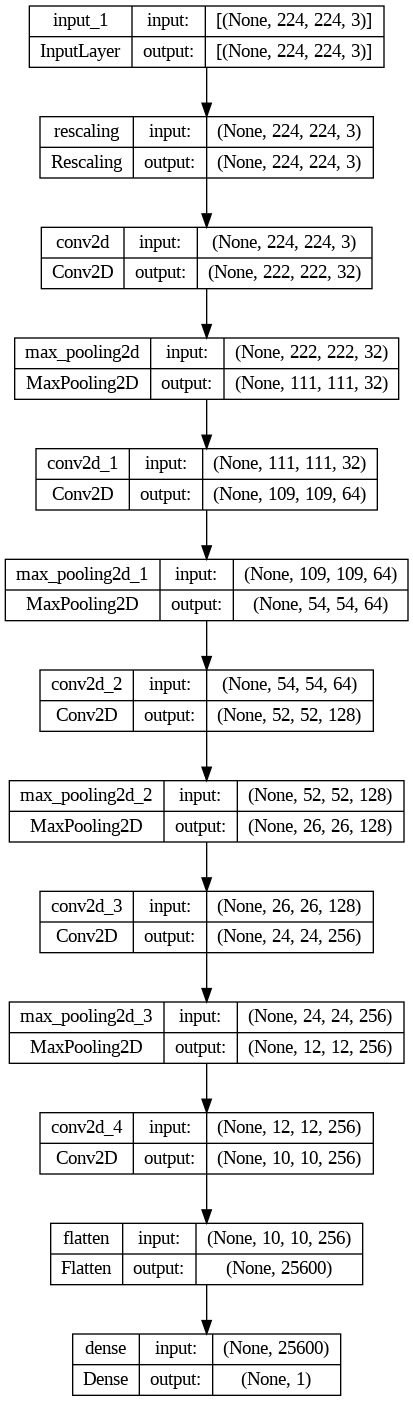

In [24]:
keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])